# Term Deposit Sale Prediction

## Author: Jinad Patel
## Email: jinadpatel@gmail.com

## Goal

Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio

## Data Source

Data set (bank-full.csv) available from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Import libraries and suppress warning

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# data manipulation libraries
import pandas as pd
import numpy as np

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Scoring libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, roc_auc_score

# Imaging tools
from IPython.display import Image
from sklearn import tree
from os import system
from IPython.display import display, HTML

# scipy
import scipy.stats as stats

%matplotlib inline
sns.set_color_codes("dark")

In [2]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 15]

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

## Exploratory Data Analysis

In [3]:
# Read CSV and print first 5 rows
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [6]:
# Check for any null values if any
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### The data we are provided with has 0 missing values.

In [7]:
# Check five point summary
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,"45,211.00",NaN,NaN,NaN,40.94,10.62,18.00,33.00,39.00,48.00,95.00
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,"45,211.00",NaN,NaN,NaN,"1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,"45,211.00",NaN,NaN,NaN,15.81,8.32,1.00,8.00,16.00,21.00,31.00


### Five point summary

* Here I would sumarize how deferent features affect out target variable (Term Deposit).
* 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous' are the continuous features that impacts our target variable.
* 'default', 'housing', 'loan' are the variables with dsicrete values. 
* 'job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome' are multiclass categorical variables which might have an impacton the target variable.
* 'balance' has the negative values which we need to correct.
* 'pdays' has also negative values, which might impact our decision making.

### Univariate Analysis

In [8]:
def cont_plot(feature):
    fig, axs = plt.subplots(1,2)
    plt.figure(figsize=(10,5))
    
    # Display ditstribution plot
    sns.distplot(data[feature],ax=axs[0],rug=True)

    # Display Bar plot to analyze the outliers
    sns.boxplot(data[feature],ax=axs[1])

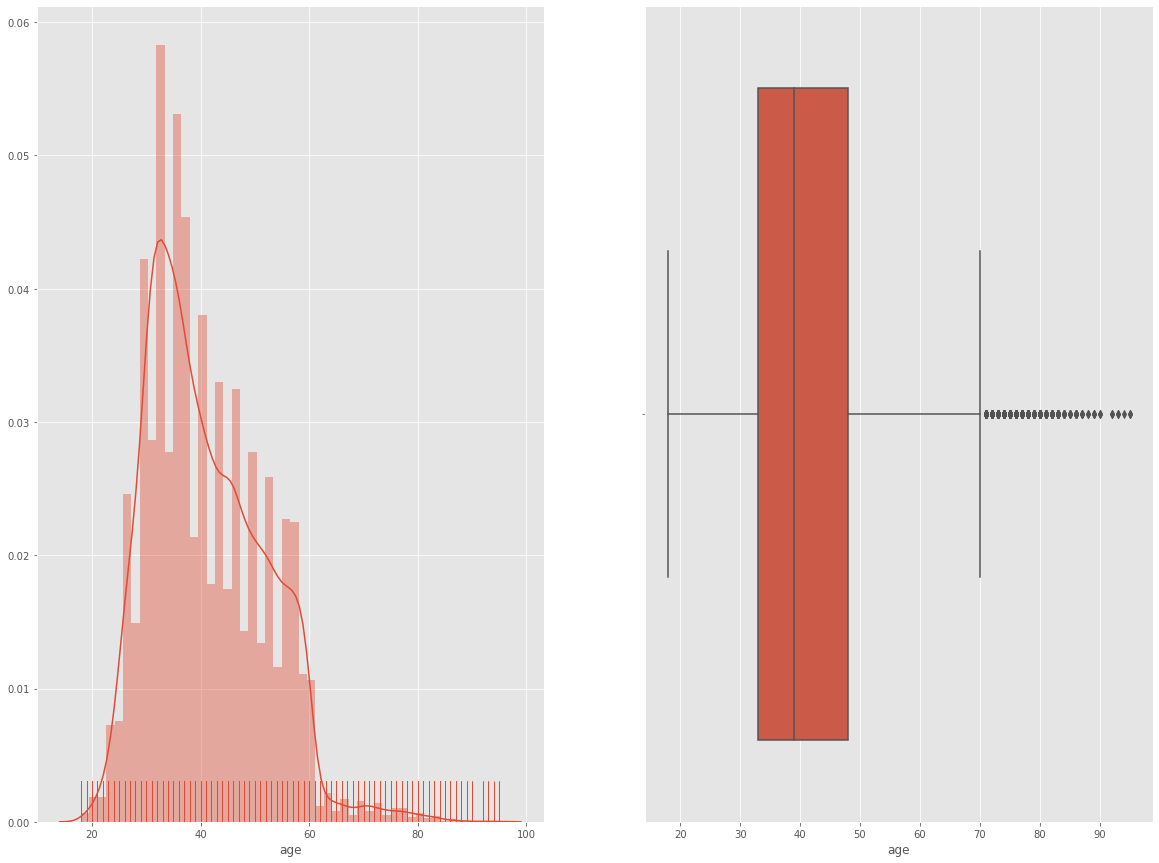

<Figure size 720x360 with 0 Axes>

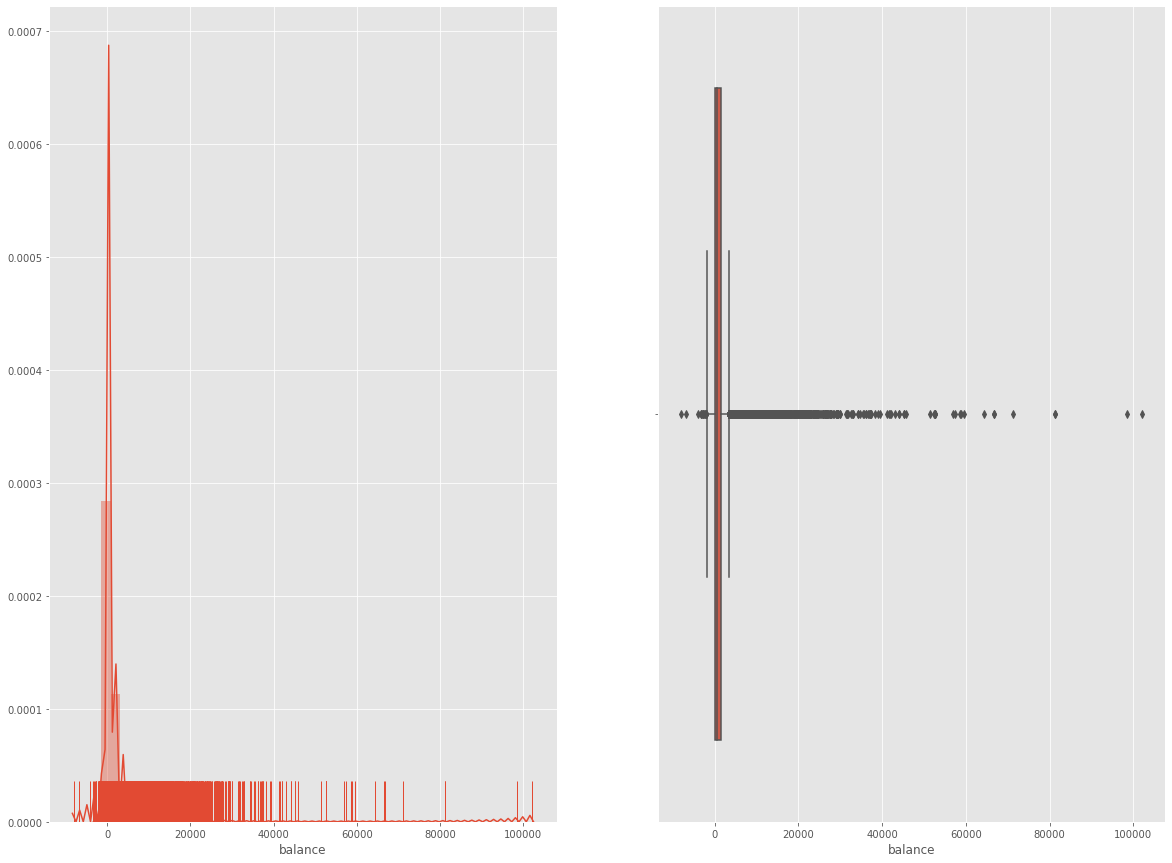

<Figure size 720x360 with 0 Axes>

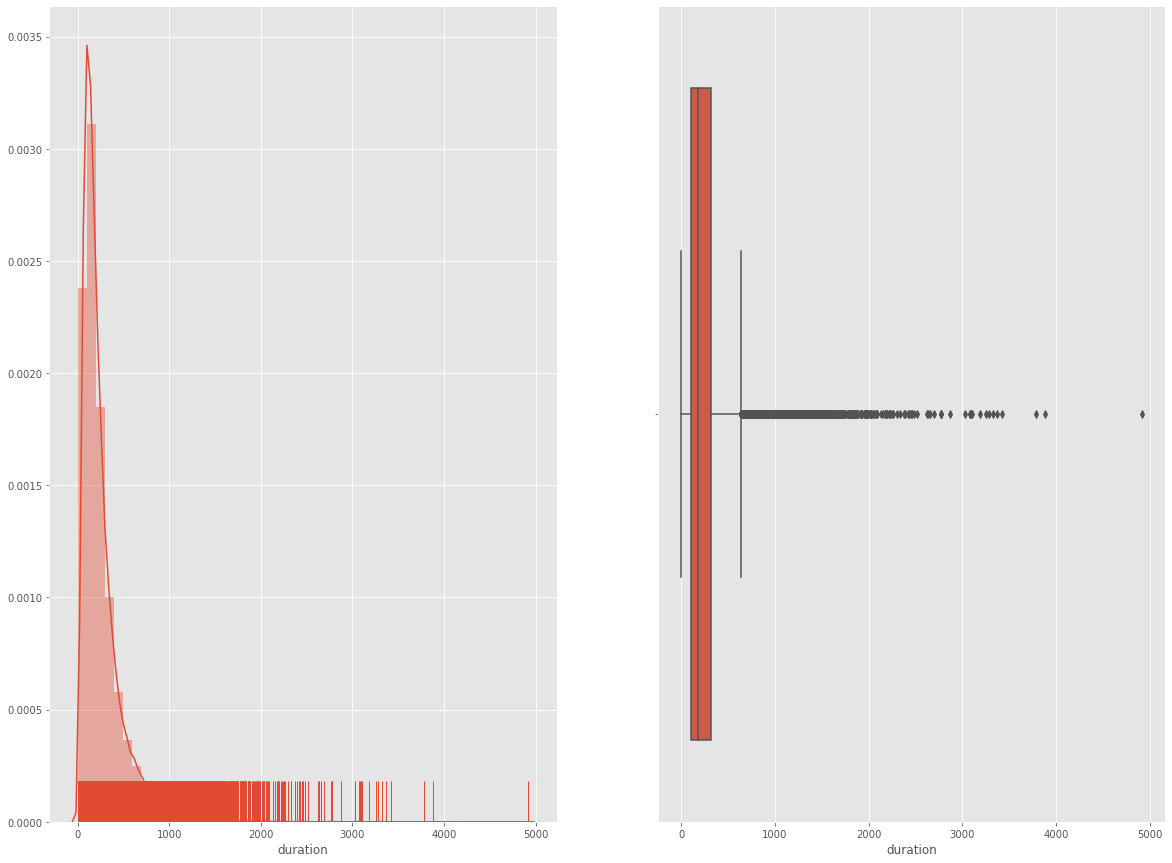

<Figure size 720x360 with 0 Axes>

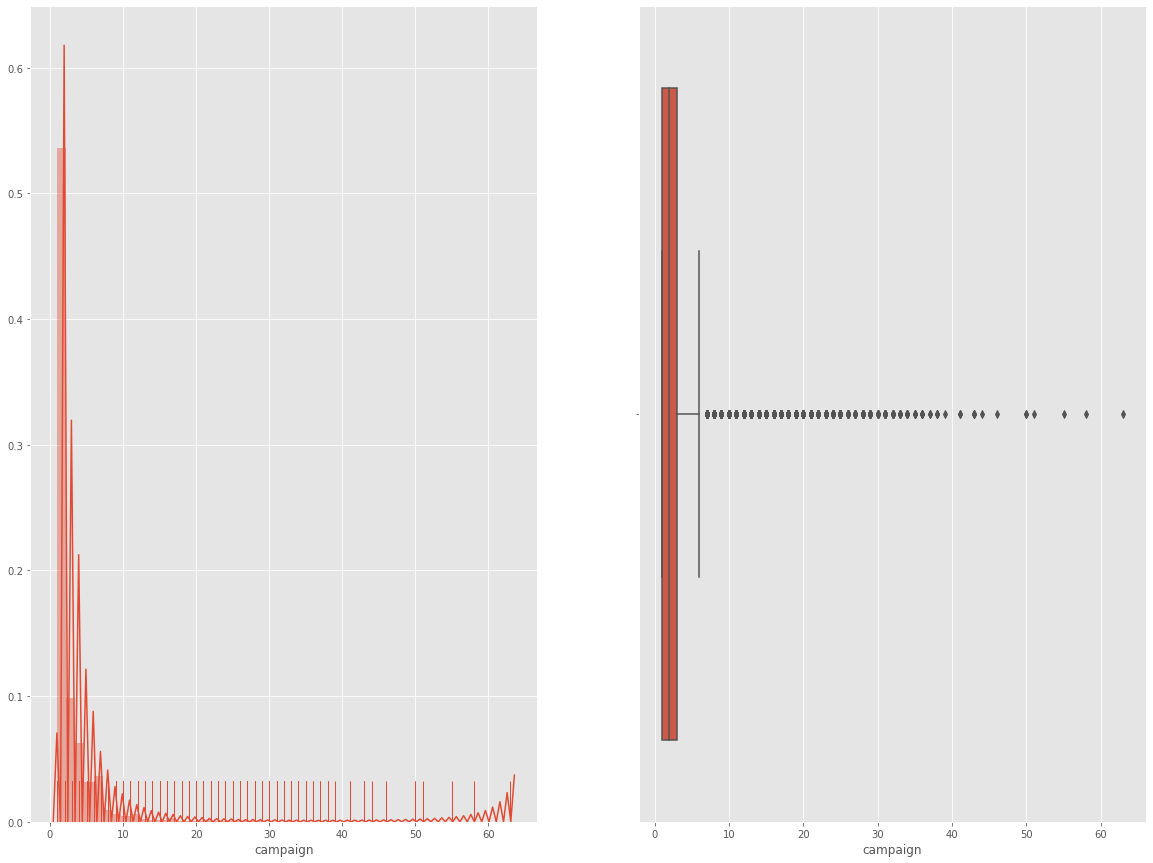

<Figure size 720x360 with 0 Axes>

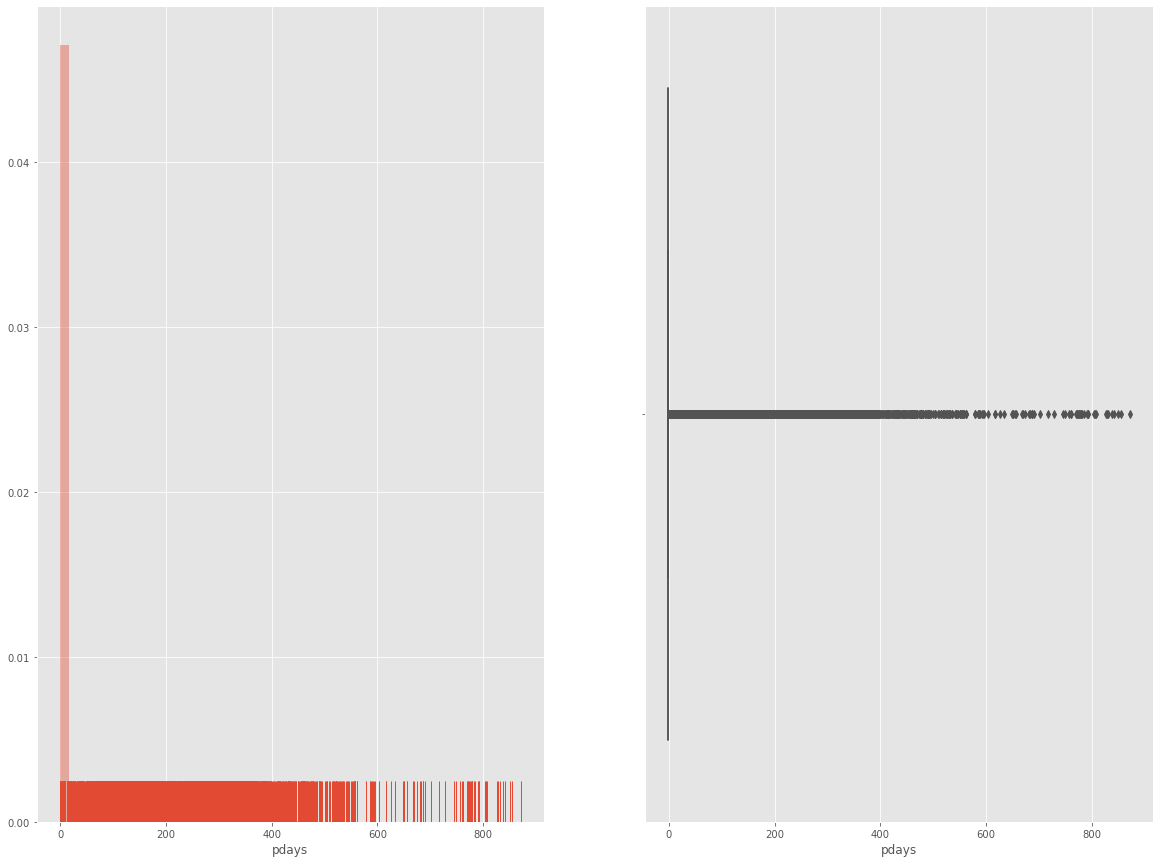

<Figure size 720x360 with 0 Axes>

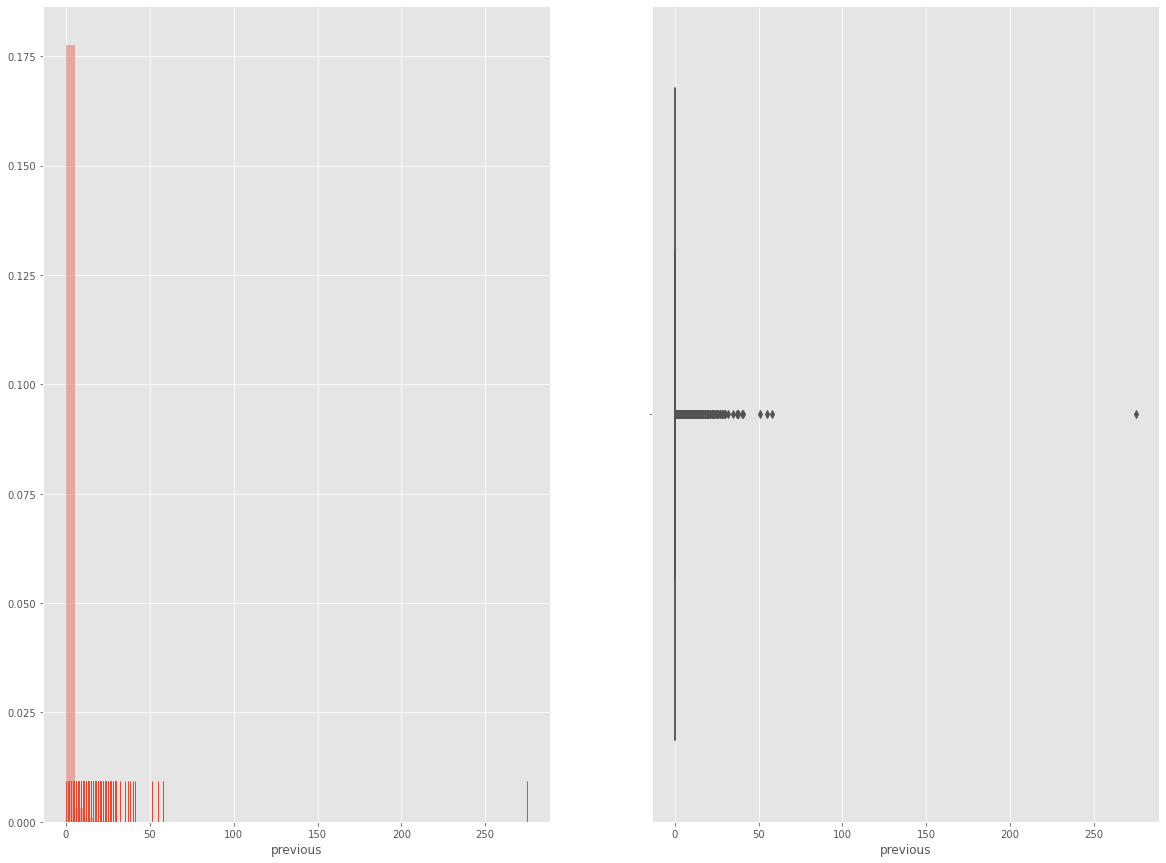

<Figure size 720x360 with 0 Axes>

In [9]:
# Let's do univariate analysis for all the continuous features.
continuous_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in continuous_cols:
    cont_plot(col)

In [10]:
# Skewness of the data
data_skew = pd.DataFrame({'Skewness' : [stats.skew(data.age),
                                      stats.skew(data.balance),
                                      stats.skew(data.duration),
                                      stats.skew(data.campaign),
                                      stats.skew(data.pdays),
                                      stats.skew(data.previous)]},
                       index=continuous_cols)
data_skew.T

,age,balance,duration,campaign,pdays,previous
Skewness,0.68,8.36,3.14,4.90,2.62,41.85


### Analysis from above EDA

* age: Minimum is 18 years and maximum is 95. The distribution is normal. Hohwever, there are some outliers.
* balance: The distribution of this attribute is highly possitively skewed The minimum value of -8019.0 indicates presence of negative (incorrect) values.
* duration: Distribution looks right skewed. Found many outliers.
* campaign: The distribution is right skewed. There are considerable number of outliers, which need to be treated.
* pdays: Data is represented number of times the person is being contacted. -1 tells us the person has not been contacted or contact period is beyond 900 days. Distribution is right skewed with large number of outliers that needs to be treated.
* previous: Data is highly right skewed with large number of outliers present.

Summary:
1. 'day' is normally distributed. No outliers are present.
2. 'balance' has some negative values that should be fixed. Replacing it with the absolutes would make sense here.
3. 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' are highly skewed and have considerable amount of outliers. We can treat this outliers with robust scalar.

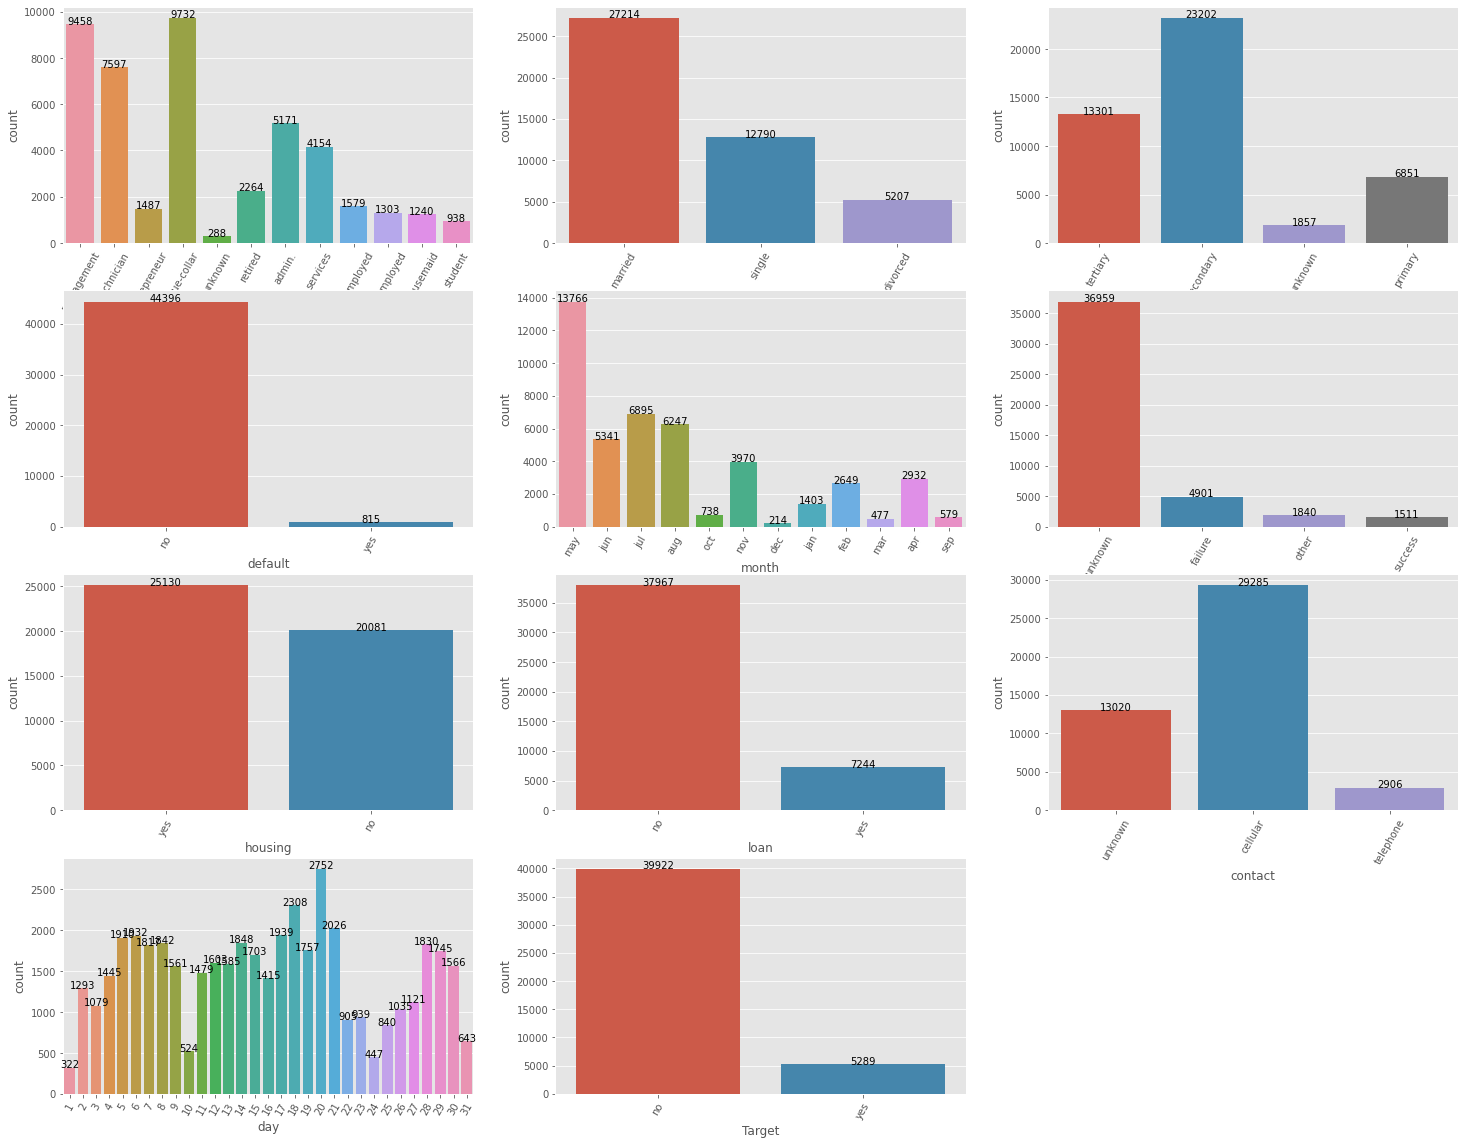

In [11]:
# Analysis for the categorical values.
categorical_cols = ['job', 'marital', 'education', 'default', 'month', 'poutcome', 'housing', 'loan', 
                 'contact', 'day', 'Target']
plt.figure(figsize=(25,20))
for idx in range(len(categorical_cols)):
    col = categorical_cols[idx]
    plt.subplot(4, 3, (idx+1))
    plot = sns.countplot(data[col])
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=60);

#### Analysis for categorical columns:

* job: From above, Blue-collar, Management professionals and Technicians are top three job categories. However, 'unknown' values need to be treated.
* marital : 3 categories: married, single and divorced.
* education: Categories: primary, secondary and tertiary. However, 'unknown' values need to be treated.
* default: Category: yes or no. Indicates whether the customer default or not. Over 44,000 customers do not default.
* housing: Category: yes or no. Indicates whether the customer is having housing loan or not. Over 25,000 have housing loan.
* loan: Category: yes or no. Indicates whether the customer is having personal loan or not. Over 37,000 have personal loan.
* contact: Category: cellular and telephone. Indicates ways to communicate with the customer. However, found some 'unknown' values.
* month: Denotes Month the customer was last contacted. 
* poutcome: Category: success, failure and other. Over 39,000 have 'unknown' value.
* day: Denotes the day the customer last contacted.
* Target: Category: Yes or No. This is out dependent variable. Large portion Over 39,000 have not subscribed.

##  Multivariate Analisys

#### Data Preparation

In [12]:
# Clean up data (mostly 'unknown' and negative values) from the categorical columns for correct analysis.
# Create the copy for existing dataset.
data_cp = data.copy(deep=True)

In [13]:
# Treat 'balance' with absolute values.
data_cp.balance = data_cp.balance.abs()
print("Customers with negative balance: ", data_cp[data_cp.balance < 0].shape[0])

Customers with negative balance:  0


In [14]:
# Treat 'contact' variable's 'unkonwn' with cellular and telephone's proportinality
contact_counts = data_cp.contact.value_counts()
cellular_percentage =  contact_counts['cellular'] / (contact_counts['cellular'] + contact_counts['telephone'])
cellular_count = int(round(contact_counts['unknown'] * cellular_percentage))
contact_values = data_cp.contact.values.tolist()
for idx in range(len(contact_values)):
    if contact_values[idx] == 'unknown':
        if cellular_count > 0:
            contact_values[idx] = 'cellular'
            cellular_count -= 1
        else:
            contact_values[idx] = 'telephone'
# Assign the results back to the dataframe.
data_cp['contact'] = contact_values
# Priny the result.
print("Customers with 'unknown' type: ", data_cp[data_cp.contact == 'unknown'].shape[0])

Customers with 'unknown' type:  0


In [15]:
# Treat 'unknown' job values based on education and age columns. As this would be most likely best columns to figure out the jpb values.
# Let's fid out education with job type using pandas cross tab function
pd.crosstab(data_cp.education, data_cp.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,209,3758,183,627,294,795,130,345,44,158,257,51
secondary,4219,5371,542,395,1121,984,577,3457,508,5229,728,71
tertiary,572,149,686,173,7801,366,833,202,223,1968,289,39
unknown,171,454,76,45,242,119,39,150,163,242,29,127


In [16]:
# Print number of 'unknown' jobs
print("Customers with unknown jobs: ", data_cp[data_cp.job == 'unknown'].shape[0])

Customers with unknown jobs:  288


In [17]:
# From above, we can say that customers with Primary, secondary education have more blue-collar job
# Where as customers with education as tertiary have management job more. We will replace the values with the mode in the unknown in this case.
data_cp.loc[(data_cp.job == 'unknown') & ((data_cp.education =='primary') | (data_cp.education =='secondary')), 'job'] = 'blue-collar' # Replace with blue-collar
data_cp.loc[(data_cp.job == 'unknown') & (data_cp.education == 'tertiary'), 'job'] = 'management' # Replaced with management for 'tertiary'
# Let's see if we got any more unknowns
print("Customers with unknown jobs: ", data_cp[data_cp.job == 'unknown'].shape[0])
# Still need to treat 127 unknown values. Let's do that based on the 'age' column.
# Marking the age above 60 as 'retired' for as job 'unknown'
data_cp.loc[(data_cp.job == 'unknown') & (data_cp.age > 60), 'job'] = 'retired'
# Marking the age above 15 and below 25 as 'student' for as job 'unknown'
data_cp.loc[(data_cp.job == 'unknown') & ((data_cp.age > 15) & (data_cp.age <= 25)), 'job'] = 'student'
# Marking rest as 'unemployed' for as job 'unknown', because no more parameters availbale to imply correctly
data_cp.loc[data_cp.job == 'unknown', 'job'] = 'unemployed'
# After final treatment
print("After treatment, Customers with unknown jobs: ", data_cp[data_cp.job == 'unknown'].shape[0])

Customers with unknown jobs:  127
After treatment, Customers with unknown jobs:  0


In [18]:
# Treat 'unknown' education values.
# Approach: Most suitable candidate to treat, we can consider the job to dictate the education values.
print("Customers with unknown education values: ", data_cp[data_cp.education == 'unknown'].shape[0])
education_job = data_cp.groupby('job').apply(lambda x: x['education'].value_counts().index[0])
dictionary = {x:y for (x,y) in zip(education_job.index, education_job.values)}
# Replace unknowns from education with corresponding popular education level for that job
data_cp['education'] = data_cp.apply(lambda x : dictionary[x['job']] if x['education'] == 'unknown' else x['education'], axis=1)
print("After treatement, Customers with unknown education values: ", data_cp[data_cp.education == 'unknown'].shape[0])

Customers with unknown education values:  1857
After treatement, Customers with unknown education values:  0


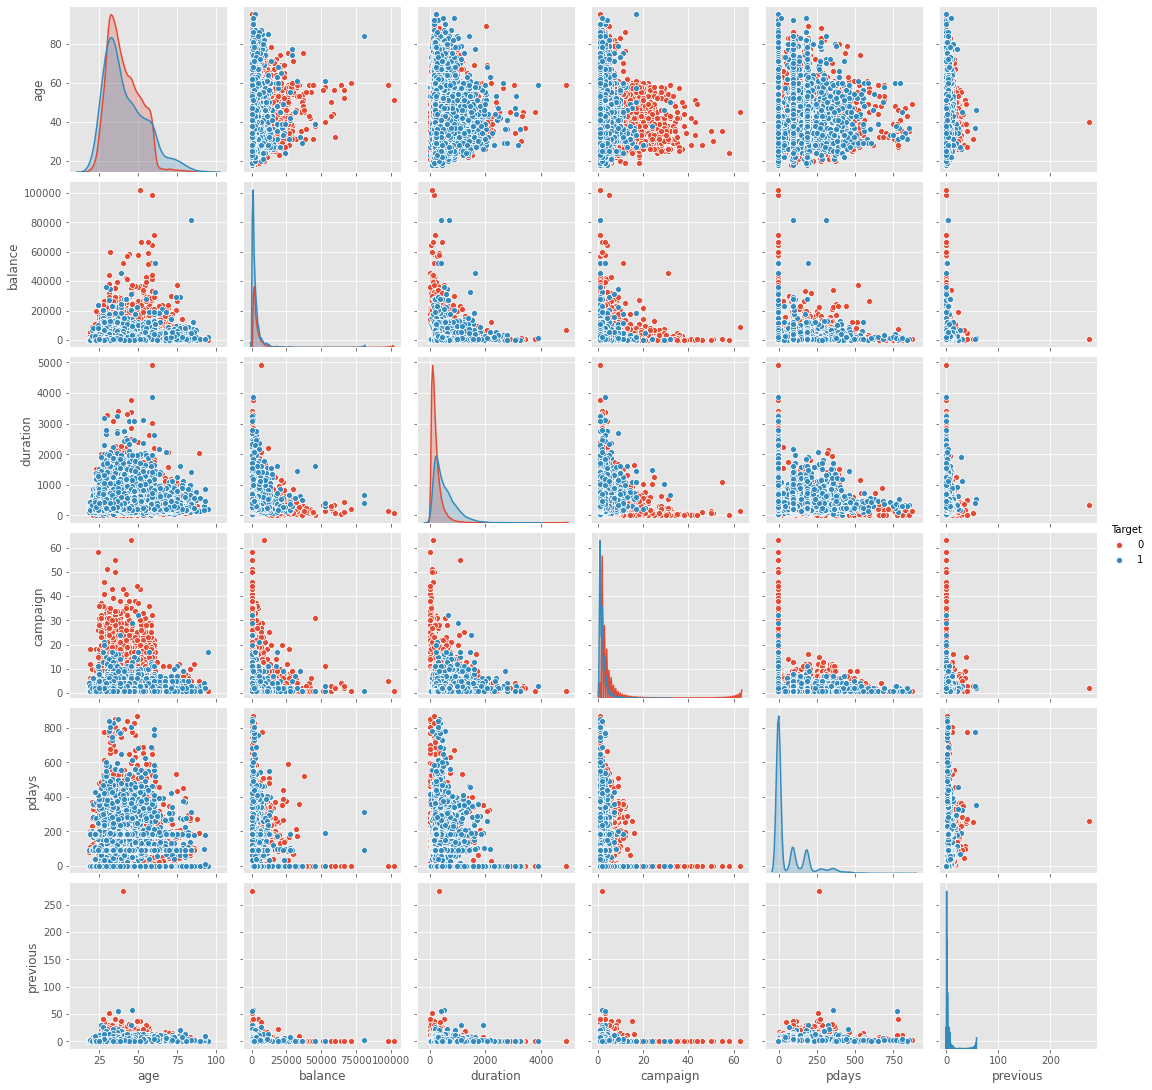

In [19]:
# Replace Target with 1 or 0
data_cp = data_cp.replace({'Target': {'yes': 1, 'no': 0}})
data_cp.head()
#data_cp.info()
# Pairplot
cols = continuous_cols + ['Target']
sns.pairplot(data_cp[cols], hue='Target')
#'age', 'balance', 'duration', 'campaign', 'pdays', 'previous'

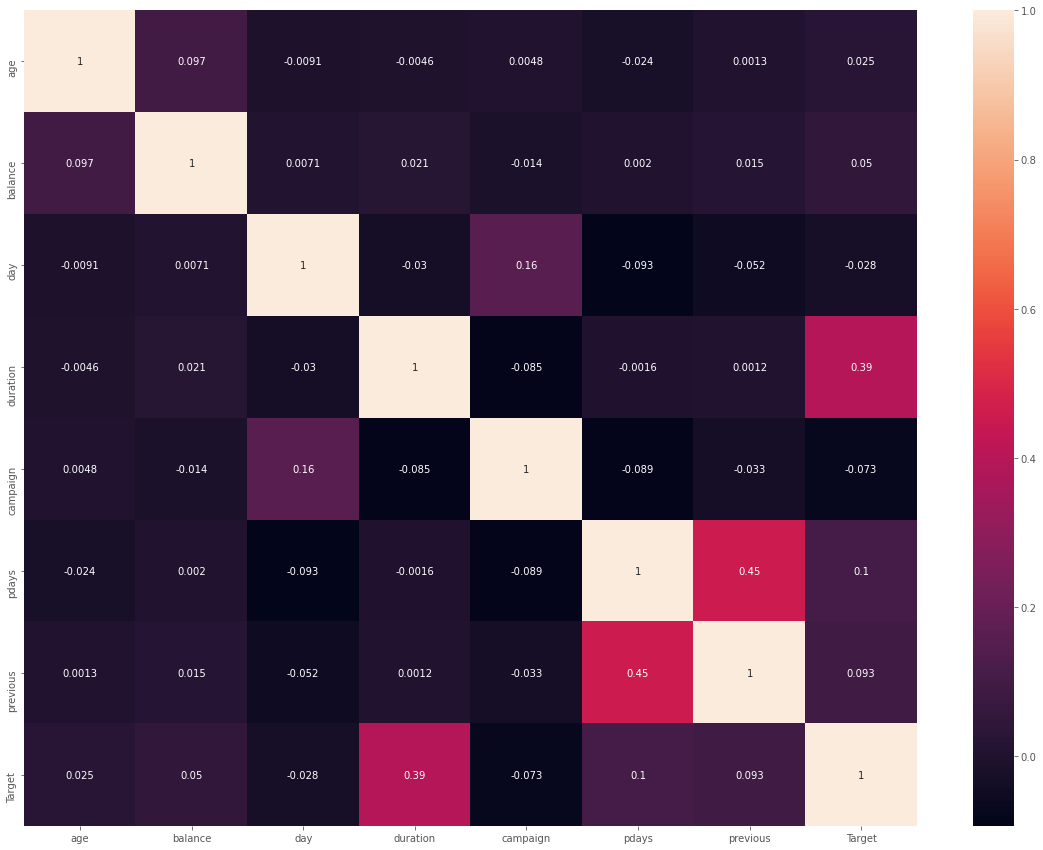

In [20]:
# Heat map
sns.heatmap(data_cp.corr(),annot=True)

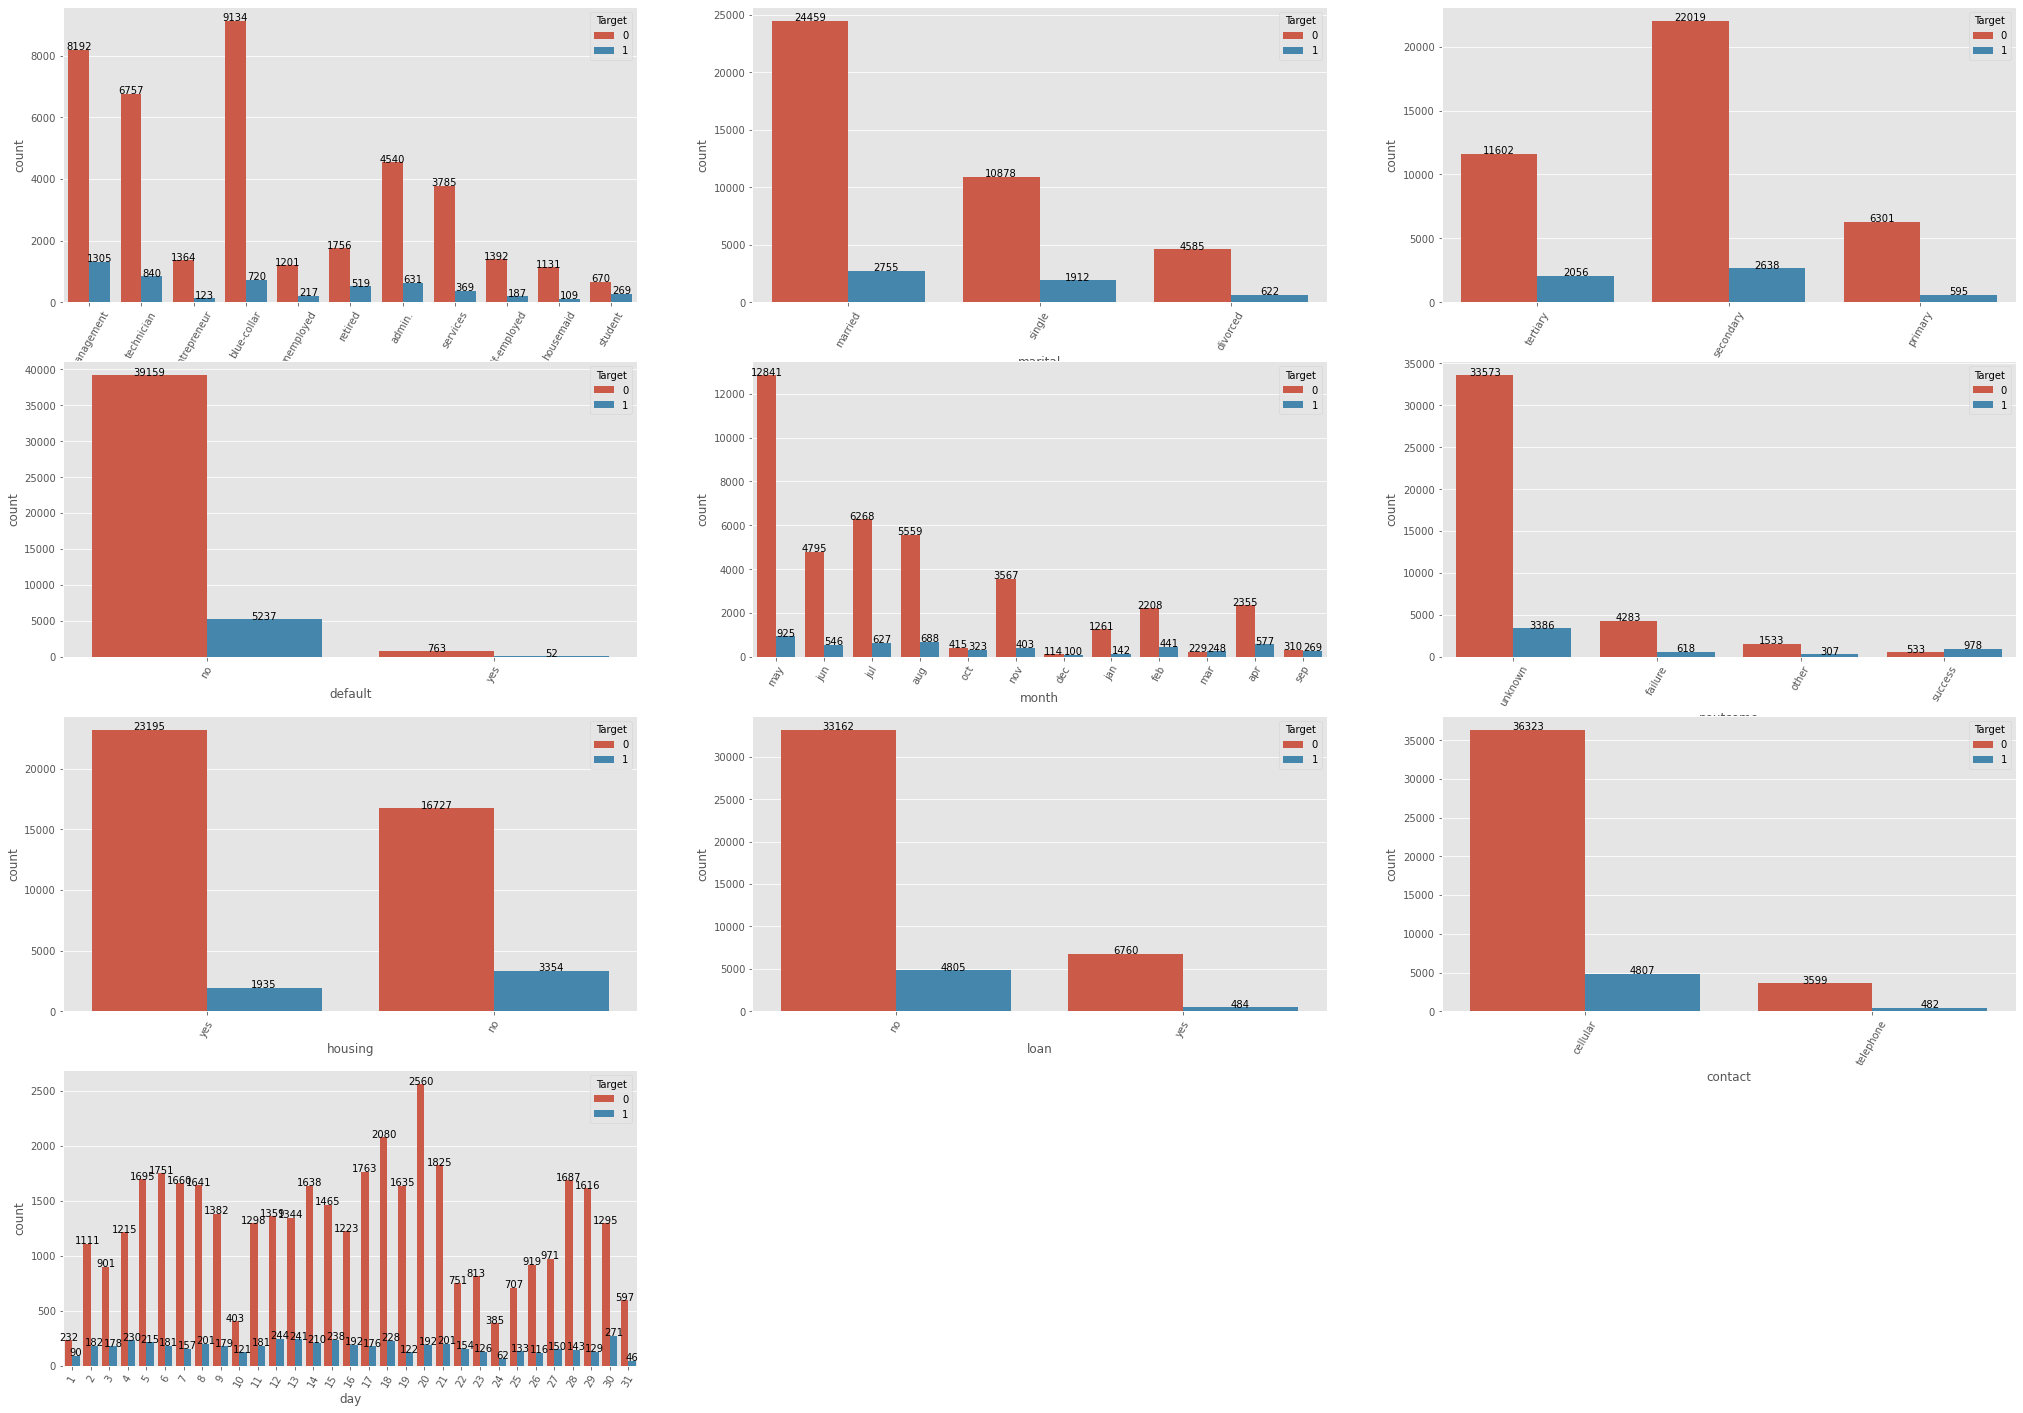

In [21]:
# Categorical variable impact on the tarhet variable
plt.figure(figsize=(35, 25))
categorical_cols.remove('Target')
for idx in range(len(categorical_cols)):
    col = categorical_cols[idx]
    plt.subplot(4, 3, (idx+1))
    plot = sns.countplot(data_cp[col], hue=data_cp.Target)
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=60);

#### Analysis:

* 'age' does not matter for the term deposit
* 'balance', 'duration', 'campaign', 'pdays' affects term deposit decision.
* When customer is contacted multiple times, it affects greatly.

## Prepeare Data

In [22]:
# Replace the object data type as categorical
for col in data_cp.columns:
    if data_cp[col].dtype == 'object':
        data_cp[col] = pd.Categorical(data_cp[col])

data_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(9), int64(8)
memory usage: 3.1 MB


### Perform one hot encoding for categorical columns and treat outliers with robust scalar

In [23]:
# One hot ecoding for categorical columns
data_cp = pd.get_dummies(data_cp, drop_first=True)
data_cp.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [24]:
# Treating outliers
robust_scaler = RobustScaler()
data_cp[continuous_cols] = robust_scaler.fit_transform(data_cp[continuous_cols])
data_cp.head(10)

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.27,1.28,5,0.38,-0.50,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.33,-0.35,5,-0.13,-0.50,0.00,0.00,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,-0.40,-0.37,5,-0.48,-0.50,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.53,0.79,5,-0.41,-0.50,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,-0.40,-0.37,5,0.08,-0.50,0.00,0.00,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5,-0.27,-0.20,5,-0.19,-0.50,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6,-0.73,-0.03,5,0.17,-0.50,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,0.20,-0.37,5,0.93,-0.50,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,1.27,-0.28,5,-0.60,-0.50,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,0.27,0.08,5,-0.58,-0.50,0.00,0.00,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Training/Test split

In [25]:
X = data_cp.drop('Target', axis=1)
y = data_cp['Target']
print("Independent shape: ", X.shape)
print("Dependent shape: ", y.shape)
print("")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=19)
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data_cp)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data_cp)) * 100))
print("")
original_total = len(data_cp)
original_loan_yes = len(data_cp[data_cp['Target'] == 1])
original_loan_no = len(data_cp[data_cp['Target'] == 0])
# Numbers from training data
training_total = len(y_train)
training_loan_yes = len(y_train.loc[y_train[:] == 1])
training_loan_no = len(y_train.loc[y_train[:] == 0])
# Numbers from test data
test_total = len(y_test)
test_loan_yes = len(y_test[y_test[:] == 1])
test_loan_no = len(y_test[y_test[:] == 0])
print("Original: True Values  : {0} ({1:0.2f}%)".format(original_loan_yes, (original_loan_yes/original_total * 100)))
print("Original: False Values : {0} ({1:0.2f}%)".format(original_loan_no, (original_loan_no/original_total * 100)))
print("")
print("Training: True Values  : {0} ({1:0.2f}%)".format(training_loan_yes, (training_loan_yes/training_total * 100)))
print("Training: False Values : {0} ({1:0.2f}%)".format(training_loan_no, (training_loan_no/training_total * 100)))
print("")
print("Testing: True Values   : {0} ({1:0.2f}%)".format(test_loan_yes, (test_loan_yes/test_total * 100)))
print("Testing: False Values  : {0} ({1:0.2f}%)".format(test_loan_no, (test_loan_no/test_total * 100)))
print("")

Independent shape:  (45211, 39)
Dependent shape:  (45211,)

70.00% data is in training set
30.00% data is in test set

Original: True Values  : 5289 (11.70%)
Original: False Values : 39922 (88.30%)

Training: True Values  : 3751 (11.85%)
Training: False Values : 27896 (88.15%)

Testing: True Values   : 1538 (11.34%)
Testing: False Values  : 12026 (88.66%)



In [26]:
# Generic methods for the lagter use
def performance_metrics(model, x_train, x_test, y_train, y_test):    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    performance_metrics_dict = {}
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    true_pos, true_neg, false_pos, false_neg = cm[0][0], cm[1][1], cm[1][0], cm[0][1] 
    performance_metrics_dict['True Positives'] = true_pos
    performance_metrics_dict['True Negatives'] = true_neg
    performance_metrics_dict['False Positives'] = false_pos
    performance_metrics_dict['False Negatives'] = false_neg
        
    # Training and testing score   
    training_score = model.score(x_train, y_train)
    testing_score  = model.score(x_test, y_test)
    performance_metrics_dict['Training Accuracy'] = round(training_score*100.0, 3)
    performance_metrics_dict['Testing Accuracy']  = round(testing_score*100.0, 3)

    # ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    performance_metrics_dict['ROC AUC'] = round(roc_auc, 3)

    # Scores
    prec_scores = precision_score(y_test, y_pred)
    rec_scores = recall_score(y_test, y_pred)
    f1_scores = f1_score(y_test, y_pred, average='macro')
    performance_metrics_dict['Percision Score'] = round(prec_scores, 3)
    performance_metrics_dict['Recall Score']    = round(rec_scores, 3)
    performance_metrics_dict['F1 score']        = round(f1_scores, 3)

    return performance_metrics_dict


def draw_dectree(dectree_clf, x_train, y_train, dot_file, image_file, class_names, feature_names):
    dectree_clf.fit(x_train, y_train)
    
    tree_file_path = open(dot_file,'w')
    dot_data = tree.export_graphviz(dectree_clf, 
                                    out_file = tree_file_path, 
                                    feature_names = feature_names, 
                                    class_names = class_names, 
                                    filled=True, rounded=True, special_characters=True)
    tree_file_path.close()

    cmd = "dot -Tpng {0} -o {1}".format(dot_file, image_file)
    retCode = system(cmd)
    if retCode > 0:
        print("Error while diplaying tree! error code: " + str(retCode))
    else:
        display(Image(image_file))

def confusion_matrix_def(model, x_train, x_test, y_train, y_test, classes=['Yes', 'No'], labels=[1, 0], title='Confusion Matrix'):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)

    plt.figure(figsize=(8,7))
    sns.heatmap(cm_df, annot=True, linewidths=0.3, annot_kws={"fontsize":15}, fmt='g')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

## Logistic Regression

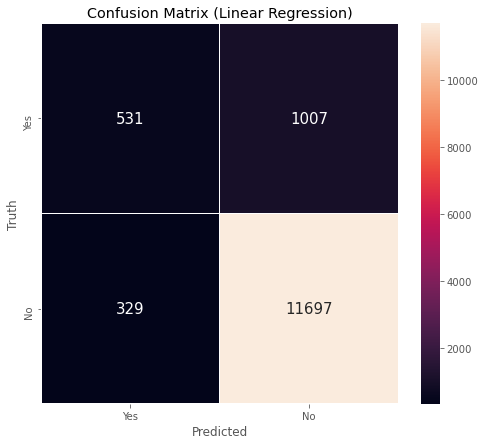

,True Positives,True Negatives,False Positives,False Negatives,Training Accuracy,Testing Accuracy,ROC AUC,Percision Score,Recall Score,F1 score
Logistic Regression Performance,531,11697,329,1007,89.99,90.15,0.66,0.62,0.34,0.69


In [27]:
logreg = LogisticRegression(random_state=19)
# Get Params
confusion_matrix_def(logreg, x_train, x_test, y_train, y_test, title='Confusion Matrix (Linear Regression)')
logreg_perf = performance_metrics(logreg, x_train, x_test, y_train, y_test)
logreg_perf_df = pd.DataFrame(logreg_perf, index=['Logistic Regression Performance'])
logreg_perf_df

## Decision Tree


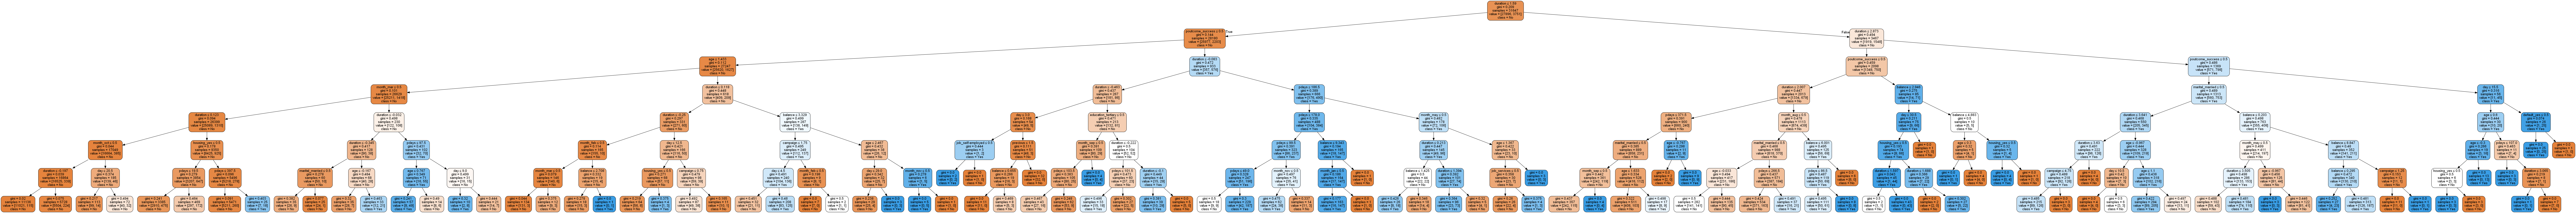

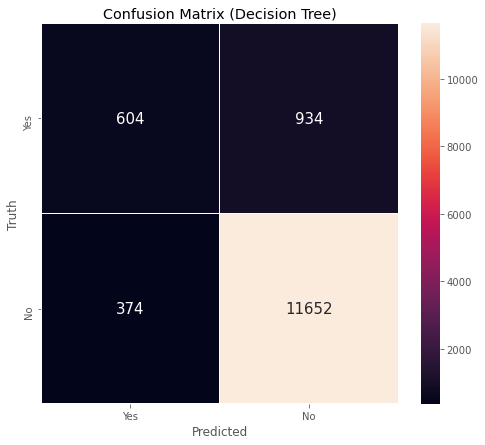

,True Positives,True Negatives,False Positives,False Negatives,Training Accuracy,Testing Accuracy,ROC AUC,Percision Score,Recall Score,F1 score
Decision Tree Performance,604,11652,374,934,91.07,90.36,0.68,0.62,0.39,0.71


In [28]:
dectree = DecisionTreeClassifier(random_state=19, criterion = 'gini', max_depth=7)
draw_dectree(dectree, x_train, y_train, 'dectree.dot', 'dectree_model.png', ['No', 'Yes'], list(x_train))
confusion_matrix_def(dectree, x_train, x_test, y_train, y_test, title='Confusion Matrix (Decision Tree)')
dectree_perf = performance_metrics(dectree, x_train, x_test, y_train, y_test)
dectree_perf_df = pd.DataFrame(dectree_perf, index=['Decision Tree Performance'])
dectree_perf_df

In [29]:
# Feature importance
imp_feat_df = pd.DataFrame(dectree.feature_importances_, columns = ['Importance'], index=x_train.columns)
imp_feat_df[imp_feat_df.Importance > 0.001].sort_values(by='Importance', ascending=False)

,Importance
duration,0.50
poutcome_success,0.26
age,0.06
pdays,0.05
month_mar,0.03
housing_yes,0.03
balance,0.02
day,0.01
marital_married,0.01
month_oct,0.01


## Ensemble method - Bagging

In [30]:
bg_cl = BaggingClassifier(base_estimator=dectree, n_estimators=50, random_state=19, bootstrap=True)
bgcl_perf = performance_metrics(bg_cl, x_train, x_test, y_train, y_test)
bgcl_perf_df = pd.DataFrame(bgcl_perf, index=['Bagging Classifier Performance'])
bgcl_perf_df

,True Positives,True Negatives,False Positives,False Negatives,Training Accuracy,Testing Accuracy,ROC AUC,Percision Score,Recall Score,F1 score
Bagging Classifier Performance,611,11667,359,927,91.63,90.52,0.68,0.63,0.40,0.72


## Ensemble Method: Random Forest

In [31]:
rndf_cl = RandomForestClassifier(n_estimators=50, random_state=19)
rndf_cl_perf = performance_metrics(rndf_cl, x_train, x_test, y_train, y_test)
rndf_cl_perf_df = pd.DataFrame(rndf_cl_perf, index=['Random Forest Classifier Performance'])
rndf_cl_perf_df

,True Positives,True Negatives,False Positives,False Negatives,Training Accuracy,Testing Accuracy,ROC AUC,Percision Score,Recall Score,F1 score
Random Forest Classifier Performance,611,11684,342,927,99.97,90.64,0.68,0.64,0.40,0.72


## Ensemblel Method: AdaBoost

In [32]:
ab_cl = AdaBoostClassifier(n_estimators=50, random_state=19)
ab_cl_perf = performance_metrics(ab_cl, x_train, x_test, y_train, y_test)
ab_cl_perf_df = pd.DataFrame(ab_cl_perf, index=['Adaptive Boosting Classifier Performance'])
ab_cl_perf_df

,True Positives,True Negatives,False Positives,False Negatives,Training Accuracy,Testing Accuracy,ROC AUC,Percision Score,Recall Score,F1 score
Adaptive Boosting Classifier Performance,576,11685,341,962,89.88,90.39,0.67,0.63,0.38,0.71


## Ensemble Method: Gradaient Bootsting

In [33]:
gb_cl = GradientBoostingClassifier(n_estimators=50, random_state=19)
gb_cl_perf = performance_metrics(gb_cl, x_train, x_test, y_train, y_test)
gb_cl_perf_df = pd.DataFrame(gb_cl_perf, index=['Gradient Boosting Classifier Performance'])
gb_cl_perf_df

,True Positives,True Negatives,False Positives,False Negatives,Training Accuracy,Testing Accuracy,ROC AUC,Percision Score,Recall Score,F1 score
Gradient Boosting Classifier Performance,580,11695,331,958,90.62,90.50,0.68,0.64,0.38,0.71


## Model Comparison

In [34]:
# Model comparisons
overall_performance_dict = {}
for key in logreg_perf.keys():
    overall_performance_dict[key] = []
    overall_performance_dict[key].extend([logreg_perf[key], dectree_perf[key], bgcl_perf[key], rndf_cl_perf[key], ab_cl_perf[key], gb_cl_perf[key]])
overall_perf_df = pd.DataFrame(overall_performance_dict, index=['Logistic Regression', 'Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting'])
overall_perf_df

,True Positives,True Negatives,False Positives,False Negatives,Training Accuracy,Testing Accuracy,ROC AUC,Percision Score,Recall Score,F1 score
Logistic Regression,531,11697,329,1007,89.99,90.15,0.66,0.62,0.34,0.69
Decision Tree,604,11652,374,934,91.07,90.36,0.68,0.62,0.39,0.71
Bagging,611,11667,359,927,91.63,90.52,0.68,0.63,0.40,0.72
Random Forest,611,11684,342,927,99.97,90.64,0.68,0.64,0.40,0.72
AdaBoost,576,11685,341,962,89.88,90.39,0.67,0.63,0.38,0.71
Gradient Boosting,580,11695,331,958,90.62,90.50,0.68,0.64,0.38,0.71


## Observations:

From the above comparison,

* We can see that **Random Forest** and **Bagging** are the top candidate here. So far considering all parametrs, **Random forest** performs better.
* I would prefer Random Forest because of higher precision score (0.64)
* Also, Decision tree have higher recall score so this is also a good candidate.But Precision score is poor as compared to Bagging and Random Foroest.
